In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

In [46]:
df = pd.DataFrame()
df

Empty DataFrame
Columns: []
Index: []

In [47]:
def combine_df(new_df,index,is_military):
    global df
    new_df = new_df[['Reaction Time','display']].dropna()
    new_df['display'] = new_df['display'].loc[(new_df['display'].str.contains('Question'))]
    new_df = new_df[['Reaction Time','display']].dropna()
    new_df = new_df.transpose()
    new_df = new_df.rename(columns=new_df.iloc[1]).drop('display')
    new_df['Is Military'] = is_military
    new_df.rename(index={'Reaction Time': index},inplace=True)
    df = pd.concat([df,new_df],axis=0)

In [48]:
folders = ['NON MILITARY','MILITARY']
for f_index,folder in enumerate(folders):
    for fn_index,filename in enumerate(os.listdir(f'{folder}/')):
        new_df = pd.read_csv(f'{folder}/{filename}')
        combine_df(new_df,fn_index,f_index)

In [49]:
df

Question 1 - b4q1   Question 2 - b2p2   Question 3 - b3p4  \
0  4073.594999994384  2037.1850000228733  2021.6200000140816   
1           2802.825            1353.925             1340.44   
2            3632.19              967.47             714.645   
3            2129.45             1172.41             1248.42   
4            3310.11             1164.48            1317.275   
5           1353.445            1099.445            1103.275   
6           2371.915             1236.76            1801.015   
7            5341.44             896.255              863.43   
8            5963.72              908.16             987.045   
0            6446.94            3768.005            2409.665   

   Question 4 - b1p5  Question 5 - b4p2   Question 6 - b3p3  \
0  4952.069999999367  5132.904999976745  1609.8599999968428   
1             8413.4            2918.18             1876.91   
2          15733.735           1072.015             1157.98   
3          10026.225            1693.14              981.11   
4             6629.5            2404.23            1545.255   
5           1986.275            1287.82            1133.595   
6            6710.41           1696.515             1579.25   
7           6769.215           2198.305             862.125   
8          11121.825            2877.38            1400.445   
0           4722.265            2490.46            2901.525   

   Question 7 - b1p1   Question 8 - b2p5   Question 9 - b4p3  \
0  4969.794999982696  1324.1850000049453  1748.9749999949709   
1            3535.55            1102.585            1665.195   
2           1913.805            2050.255             1151.76   
3            3205.95             1063.37             854.345   
4           1948.215              803.91            1267.235   
5           2826.895             2663.28            1197.435   
6            5387.95             966.255             1045.25   
7            2736.18              740.51            1622.535   
8            3076.09             1248.21            1130.235   
0            2592.74             1760.58            2570.625   

   Question 10 - b3p2  ...  Question 12 - b1p2  Question 13 - b4p4  \
0  1366.5449999971315  ...  1401.7800000146963  1561.4549999882001   
1             718.395  ...             925.235             2291.07   
2             689.755  ...              694.99            1087.245   
3             735.525  ...             702.305             872.225   
4             721.655  ...              876.52             1199.48   
5              848.12  ...             976.525            1280.295   
6             828.605  ...              906.81             1086.29   
7              680.14  ...             887.745            1285.895   
8               707.8  ...              662.19            1032.375   
0            1600.665  ...             960.015            1311.575   

   Question 14 - b1p4 Question 15 - b2p4  Question 16 - b3p5  \
0  1340.9999999857973  4344.559999997728  4671.0000000020955   
1            1334.475            1444.07             3231.33   
2              701.15           2648.005             2052.81   
3               710.2            1531.94             1128.55   
4             710.355           4998.185            1591.375   
5            1198.725            2451.48             1812.95   
6             667.165            993.185            15512.42   
7              688.65            1032.29              906.62   
8             591.105            4274.31            9858.335   
0            1272.225           1049.665             5018.44   

  Question 17 - b2p3  Question 18 - b4p5 Question 19 - b3p1  \
0  2128.724999987753  2065.1799999759533  2495.330000005197   
1           1524.815            2649.135            2967.45   
2             917.57            2106.195           1257.405   
3           1349.355            2495.675            998.315   
4             996.05            1733.945             988.12   
5            1184.78           16695.235     

In [50]:
df = df.apply(pd.to_numeric)

In [51]:
df.isna().sum()

Question 1 - b4q1     0
Question 2 - b2p2     0
Question 3 - b3p4     0
Question 4 - b1p5     0
Question 5 - b4p2     0
Question 6 - b3p3     0
Question 7 - b1p1     0
Question 8 - b2p5     0
Question 9 - b4p3     0
Question 10 - b3p2    0
Question 11 - b2p1    0
Question 12 - b1p2    0
Question 13 - b4p4    0
Question 14 - b1p4    0
Question 15 - b2p4    0
Question 16 - b3p5    0
Question 17 - b2p3    0
Question 18 - b4p5    0
Question 19 - b3p1    0
Question 20 - b1p3    0
Is Military           0
dtype: int64

In [70]:
df_military = df[df['Is Military']==1].drop('Is Military',axis=1)
df_non_military = df[df['Is Military']==0].drop('Is Military',axis=1)

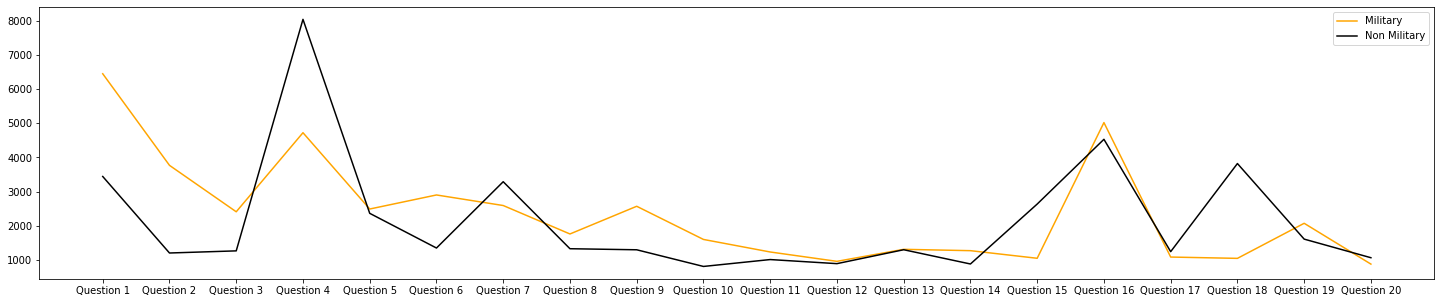

In [73]:
plt.figure(figsize=(25,5))
sns.lineplot(x=[name[:-7] for name in df_military.columns],y=df_military.mean(),color='orange')
sns.lineplot(x=[name[:-7] for name in df_non_military.columns],y=df_non_military.mean(),color='black')

plt.legend(labels=['Military', 'Non Military'])